In [1]:
"I have an image. Given an instruction to edit the image, carefully generate a description of the edited image."

'I have an image. Given an instruction to edit the image, carefully generate a description of the edited image.'

In [2]:
print("I will put my image content beginning with \"Image Content:\". The instruction I provide will begin with \"Instruction:\". The edited description you generate should begin with \"Edited Description:\". You just generate one edited description only begin with \"Edited Description:\". The edited description needs to be as simple as possible and only reflects image content. Just one line.\nA example:\nImage Content: a man adjusting a woman's tie.\nInstruction: has the woman and the man with the roles switched.\nEdited Description: a woman adjusting a man's tie.\n\nImage Content: {}\nInstruction: {}\nEdited Description:")

I will put my image content beginning with "Image Content:". The instruction I provide will begin with "Instruction:". The edited description you generate should begin with "Edited Description:". You just generate one edited description only begin with "Edited Description:". The edited description needs to be as simple as possible and only reflects image content. Just one line.
A example:
Image Content: a man adjusting a woman's tie.
Instruction: has the woman and the man with the roles switched.
Edited Description: a woman adjusting a man's tie.

Image Content: {}
Instruction: {}
Edited Description:


In [ ]:
"You are given a textual description of an image called 'Image Content' and a textual instruction to edit the image called 'Instruction'. Imagine the image based on the image content and edit the image based on the instruction. Then, generate a textual description of the edited image."

In [12]:
def first_diff(s: str, t: str) -> int:
    """Return the first index where s and t differ, or –1 if they’re identical."""
    # walk both in lock-step
    for i, (a, b) in enumerate(zip(s, t)):
        if a != b:
            return i
    # one may be a prefix of the other
    if len(s) != len(t):
        return min(len(s), len(t))
    # no differences
    return -1



In [14]:
usr1 = "I will put my image content beginning with \"Image Content:\". The instruction I provide will begin with \"Instruction:\". The edited description you generate should begin with \"Edited Description:\". You just generate one edited description only begin with \"Edited Description:\". The edited description needs to be as simple as possible and only reflects image content. Just one line.\nA example:\nImage Content: a man adjusting a woman's tie.\nInstruction: has the woman and the man with the roles switched.\nEdited Description: a woman adjusting a man's tie.\n\nImage Content: {}\nInstruction: {}\nEdited Description:"
usr2 = "I will put my image content beginning with \"Image Content:\". The instruction I provide will begin with \"Instruction:\". The edited description you generate should begin with \"Edited Description:\". You just generate one edited description only begin with \"Edited Description:\". The edited description needs to be as simple as possible and only reflects image content. Just one line.\nA example:\nImage Content: a man adjusting a woman's tie.\nInstruction: has the woman and the man with the roles switched.\nEdited Description: a woman adjusting a man's tie.\n\nImage Content: {}\nInstruction: {}\nEdited Description:"
first_diff(usr1, usr2)

-1

----------------------------------

In [5]:
from utils import targetpad_transform
from datasets import FashionIQDataset

usage: ipykernel_launcher.py [-h] [--dataset {cirr,circo,fashioniq}]
                             [--dataset_path DATASET_PATH]
                             [--model_type {SEIZE-B,SEIZE-L,SEIZE-H,SEIZE-g,SEIZE-G,SEIZE-CoCa-B,SEIZE-CoCa-L}]
                             [--gpt_version {gpt-3.5,gpt-4,gpt-4o}]
                             [--submission_name SUBMISSION_NAME]
                             [--caption_type {none,t5,opt}]
                             [--nums_caption NUMS_CAPTION]
                             [--use_momentum_strategy USE_MOMENTUM_STRATEGY]
                             [--pos_factor POS_FACTOR]
                             [--neg_factor NEG_FACTOR]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/hanyuan/.local/share/jupyter/runtime/kernel-v38dcc82f40ec1688c3592fb04c4d3de6ec39dc1bd.json


SystemExit: 2

In [ ]:
dataset_path = "FashionIQ_multi_opt_gpt35_5_p1"
dress_type = "shirt"
preprocess = targetpad_transform(1.25, 224)
relative_val_dataset = FashionIQDataset(
    dataset_path, 
    'val', 
    [dress_type], 
    'relative', 
    preprocess
)

In [1]:
from pathlib import Path
import numpy as np
index_dir = Path("/home/hanyuan/Desktop/IR_Final/FashionIQ_cap_num_15_split1/retrieved_index_names")
dress_distances = np.load(index_dir / "dress_distances.npy")
dress_sorted_index_names = np.load(index_dir / "dress_sorted_index_names.npy")

In [2]:
dress_distances.shape

(2017, 3817)

In [4]:
dress_sorted_index_names.shape

(2017, 3817)

In [12]:
import matplotlib.pyplot as plt
from pathlib import Path
import PIL.Image
import math

def show_topk_grid(dataset_path: Path,
                   sorted_index_names: np.ndarray,
                   distances: np.ndarray,
                   top_k: int = 50,
                   ncols: int = 10,
                   img_ext: str = ".png"):
    """
    Display the top_k retrieved images in a grid, ordered by increasing distance.
    
    Args:
        dataset_path: Path to the FashionIQ root (must contain an 'images/' subfolder).
        sorted_index_names: 1D array of all index_names sorted by distance ascending.
        distances: 1D tensor of distances aligned with sorted_index_names.
        top_k: how many of the top items to show.
        ncols: how many columns in the grid.
        img_ext: file extension of your images (e.g. ".png" or ".jpg").
    """
    topk_names = sorted_index_names[:top_k]

    sorted_indices = np.argsort(distances)[:top_k]
    topk_dists = distances[sorted_indices]
    
    nrows = math.ceil(top_k / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    axes = axes.flatten()
    
    for i, (name, dist) in enumerate(zip(topk_names, topk_dists)):
        img_path = dataset_path / "images" / (str(name) + img_ext)
        img = PIL.Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{dist:.4f}", fontsize=8)
        axes[i].axis("off")
    
    # hide any leftover axes
    for j in range(top_k, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()


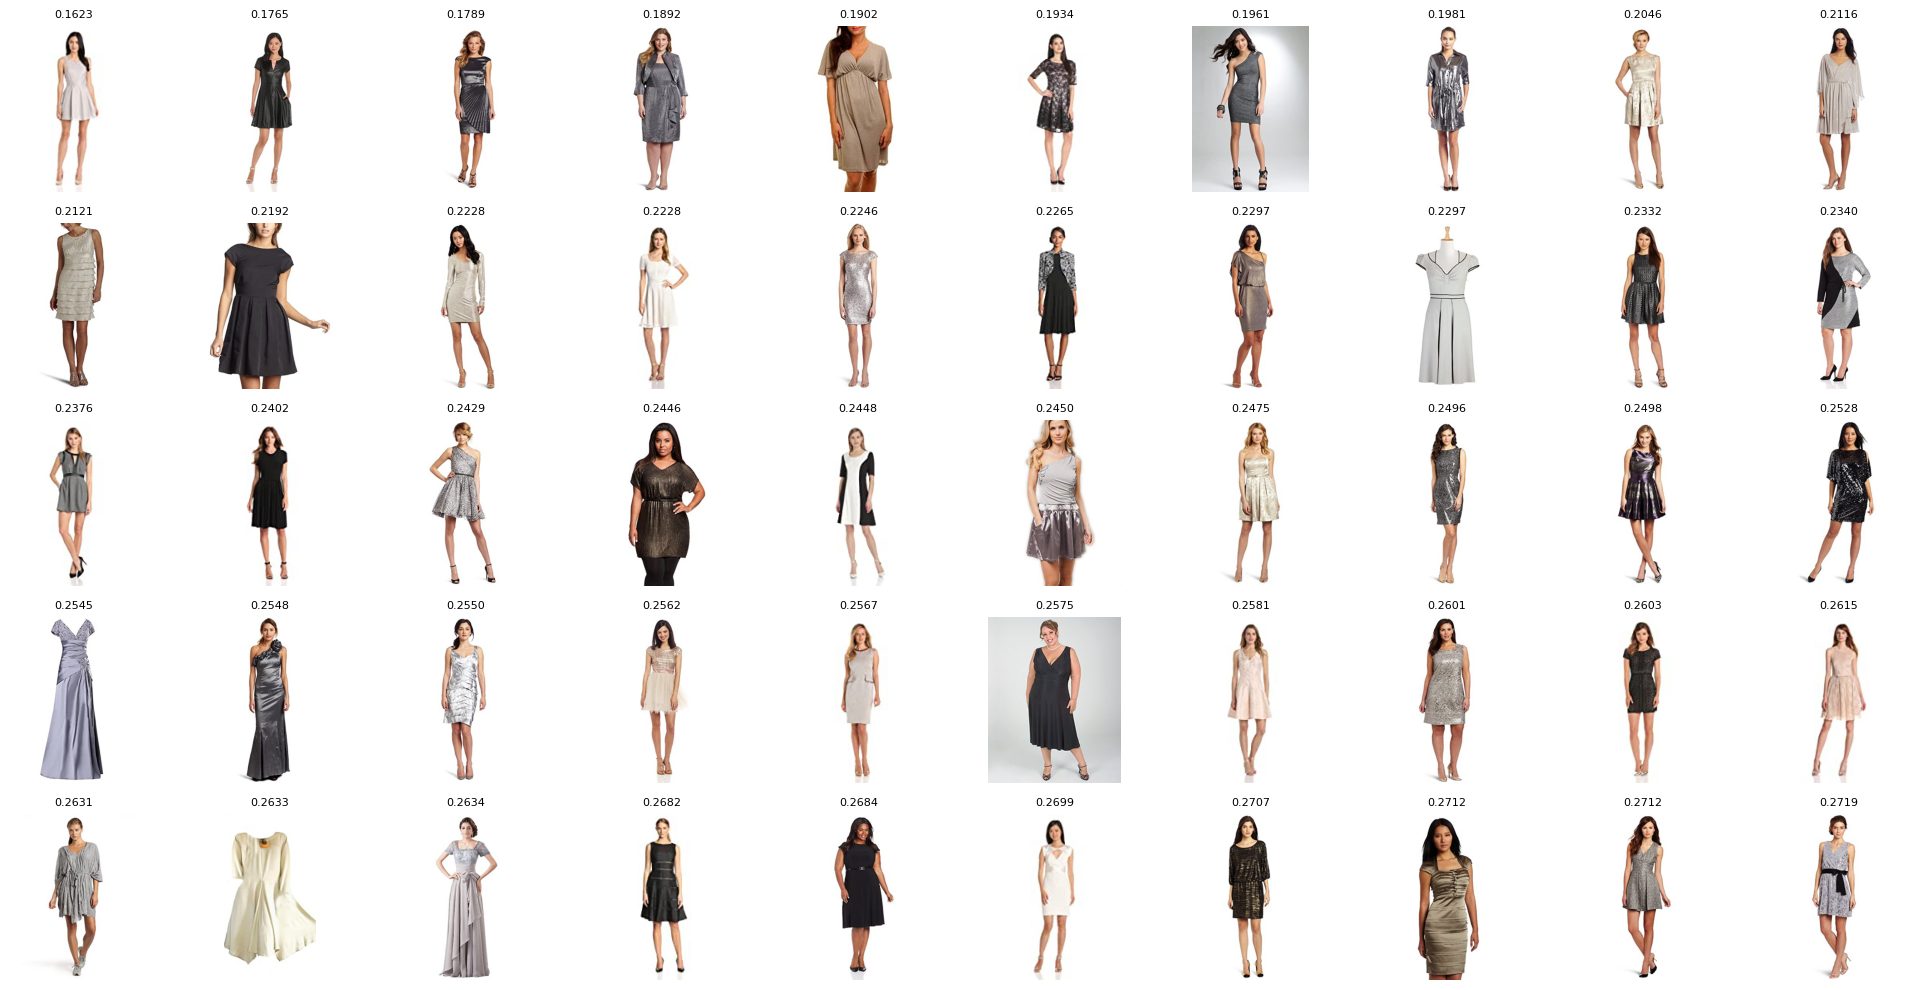

In [13]:
show_topk_grid(
    Path("/home/hanyuan/Desktop/IR_Final/FashionIQ_cap_num_15_split1"),
    dress_sorted_index_names[0],
    dress_distances[0]
)